# Import TensorFlow and MNIST dataset 

In [1]:

import tensorflow as tf
from tensorflow import keras


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
len(X_train)

60000

In [3]:
len(X_test)

10000

In [4]:
X_train[0].shape


(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

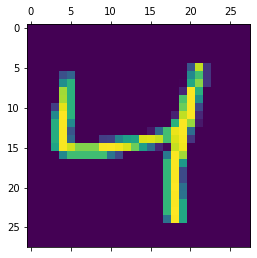

In [6]:
import matplotlib.pyplot as plt

plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Visualization


3


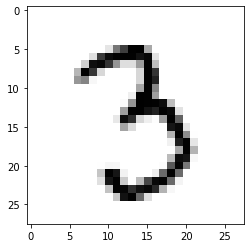

In [9]:
import matplotlib.pyplot as plt


image_index  = 30000 # we may select anything up to 60.000

print(y_train[image_index]) # here the label is 3
plt.imshow(X_train[image_index], cmap = 'Greys')

We also need to know the shape of the dataset to channel it to the convolutional neural network. Therefore, I will use the “shape” attribute of NumPy array with the following code:


In [10]:
X_train.shape

(60000, 28, 28)

60000 represents the number of images in the train dataset and (28,28) represents the size of the image: 28 x28 pixel

# Normalize the Images


In order to use the dataset in Keras API, i need 4-dims NumPy arrays.
our array is 3-dims. In additionwe must normalize our data as it is always
required in neural network models. We can achieve this by dividing
the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). 
This can be done with the following code:

In [11]:
#Reshqping the array to 4-dims

X_train= X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape = (28,28,1)

# converting the values to float in case they were't 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# Normaliwing the RGB codes 

X_train /= 255
X_test /= 255

print('x_train shape :' , X_train.shape)
print(' Number of images in x_train' , X_train.shape[0])
print(' Number of images in x_test' , X_test.shape[0])



x_train shape : (60000, 28, 28, 1)
 Number of images in x_train 60000
 Number of images in x_test 10000


# Building our CNN

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.models import Sequential

# we are going to create a sequential Model and adding the layers



In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

The final Dense Layer must have 10 neurons since ze have 10 numbers from 0 to 9

# Compiling and Fitting the Model

ValueError: in user code:

    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\LAPTOPC STORE\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28, 28, 1)


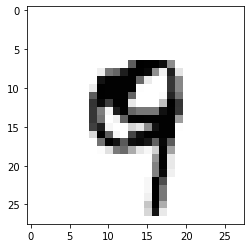

In [15]:

image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [16]:
import numpy as np
# Make the predictions
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    6,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  922,   18,    9,    3,   13,    9,   37,    5],
       [   2,    0,   16,  930,    1,   19,    3,   10,   20,    9],
       [   1,    1,    5,    2,  917,    0,   10,    4,    7,   35],
       [   7,    3,    1,   37,   10,  772,   16,    8,   32,    6],
       [  13,    3,    5,    1,    7,   10,  916,    1,    2,    0],
       [   1,    6,   23,    7,    7,    1,    0,  940,    2,   41],
       [   7,   12,    6,   28,    9,   23,    9,   10,  856,   14],
       [  11,    7,    1,    9,   27,    6,    0,   14,    5,  929]])>

# Using seaborn to make confusion matrix look good

Text(69.0, 0.5, 'Truth')

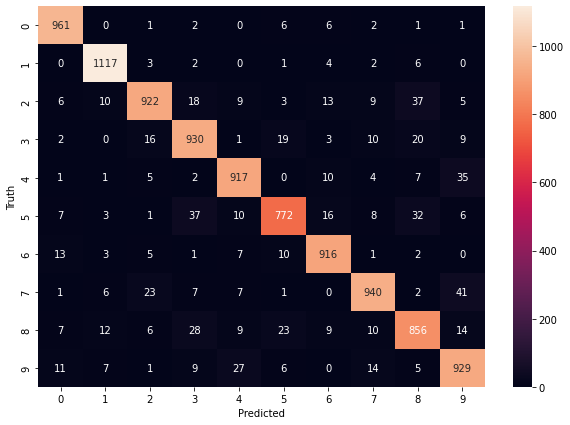

In [37]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')


In [29]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2635 - accuracy: 0.9278


[0.26351842284202576, 0.9277999997138977]

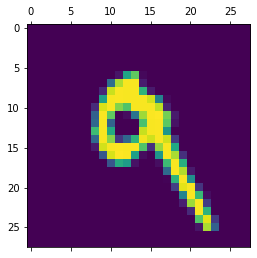

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining yaml:  99%|#########9| 158/159 [03:03<00:01,  1.15s/it]        
                                                                 

Determining conflicts:   0%|          | 0/159 [00:00<?, ?it/s]
Examining conflict for pyparsing bleach pip seaborn packaging:   0%|          | 0/159 [00:00<?, ?it/s]
Examining conflict for pyparsing libpng idna terminado jupyterlab_pygments pywinpty multidict termcolor argon2-cffi openssl protobuf debugpy frozenlist mkl_fft keras-gpu jupyter_core tornado keras-base pywin32 cryptography aiosignal importlib-metadata astunparse cudnn hdf5 pyjwt h5py mkl_random backcall parso mkl-service cudatoolkit pygments zipp grpcio async_generator numpy pyasn1-modules attrs blinker oauthlib certifi seaborn nbformat opt_einsum packaging markupsafe tensorboard-plugin-wit nbclient tensorboard ipykernel console_shortcut decorator charset-normalizer tensorflow async-timeout jupyter_client importlib_metadata pyrsistent typing_extensions entrypoints libprotobuf zlib si

frozenlist -> python[version='>=3.10,<3.11.0a0'] -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.36.0,<4.0a0|>=3.35.4,<4.0a0']
brotlipy -> python[version='>=3.8,<3.9.0a0'] -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4.0a0|>=3.36.0,<4.0a0|>=3.35.4,<4.0a0|>=3.35.1,<4.0a0|>=3.28.0,<4.0a0|>=3.27.2,<4.0a0']
numpy-base -> python[version='>=3.6,<3.7.0a0'] -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.33.0,<4.0a0|>=3.35.1,<4.0a0|>=3.28.0,<4.0a0|>=3.27.2,<4.0a0|>=3.36.0,<4.0a0|>=3.32.3,<4.0a0|>=3.30.0,<4.0a0|>=3.35.4,<4.0a0']
rsa -> python -> sqlite[version='>=3.25.3,<4.0a0|>=3.26.0,<4.0a0|>=3.27.2,<4.0a0|>=3.28.0,<4.0a0|>=3.29.0,<4.0a0|>=3.30.0,<4.0a0|>=3.30.1,<4.0a0|>=3.31.1,<4.0a0|>=3.32.3,<4.0a0|>=3.33.0,<4

In [34]:
# Show the image
plt.matshow(X_test[7])